In [1]:
from FPSim2 import FPSim2Engine
from physicochem_properties_calculation import *
from sklearn.preprocessing import StandardScaler
from characterization import *

Training set

In [2]:
Training_data = pd.read_csv("../Data/Training_data_withoutInfo.csv", sep='|')
toxic_set = Training_data[Training_data.Mark == 1]
benign_set = Training_data[Training_data.Mark == 0]

Test set

In [3]:
testset = pd.read_csv('../Data/test_set_preprocessed.csv', sep='|')

# UMAP

In [4]:
benign_set = benign_set[['SmilesForDropDu']]
toxic_set = toxic_set[['SmilesForDropDu']]
benign_set['db'] = 'benign_drugs'
toxic_set['db'] = 'toxic_drugs'

In [5]:
get_physicochemical_properties(benign_set,'SmilesForDropDu')
get_physicochemical_properties(toxic_set,'SmilesForDropDu')
get_physicochemical_properties(Training_data,'SmilesForDropDu')
get_physicochemical_properties(testset,'SmilesForDropDu')

Start calculcating parameters.
Start calculcating parameters.
Start calculcating parameters.
Start calculcating parameters.


In [6]:
get_further_physicochemical_properties(Training_data)
get_further_physicochemical_properties(testset)
get_further_physicochemical_properties(benign_set)
get_further_physicochemical_properties(toxic_set)

Start calculcating further properties.
Start calculcating further properties.
Start calculcating further properties.
Start calculcating further properties.


In [7]:
Training_data_sim = Training_data[['SmilesForDropDu', 'Molecule', 'N', 'O', 'chiral', 'MW', 'heavy_atoms', 'h_acc', 'h_don', 'logP', 'TPSA', 'numAro','formalCharge', 'frac_csp3', 'S', 'nHalogens', 'MR']]
testset_sim = testset[['SmilesForDropDu', 'Molecule', 'N', 'O', 'chiral', 'MW', 'heavy_atoms', 'h_acc', 'h_don', 'logP', 'TPSA', 'numAro','formalCharge', 'frac_csp3', 'S', 'nHalogens', 'MR']]

In [ ]:
Training_data_sim['db'] = 'Training set'
testset_sim['db'] = 'Test set'

Select one of the options to visualize the chemical space

In [19]:
TrainingAndTest_df = pd.concat([Training_data_sim, testset_sim], axis=0,ignore_index=True)
dataframe = TrainingAndTest_df

In [24]:
BenignAndToxic_df = pd.concat([benign_set,toxic_set], axis=0,ignore_index=True)
dataframe = BenignAndToxic_df

Physicochemical properties

In [25]:
property_data = dataframe.drop(columns=['SmilesForDropDu', 'db','Molecule'], axis=1)
scaled_property_data = StandardScaler().fit_transform(property_data)

Morgan2 fingerprints

In [ ]:
dataframe.Molecule = dataframe.SmilesForDropDu.apply(Chem.MolFromSmiles)
dataframe['fp'] = dataframe.Molecule.apply(get_morgan2)
morgan2_cols_list = ['morgan2_b'+ str(i) for i in list(range(2048))]
dataframe[morgan2_cols_list] = dataframe['fp'].to_list()
morgan2_cols = dataframe[morgan2_cols_list].to_numpy()

plot

/home/hzhang/anaconda3/envs/trialblazer/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hzhang/anaconda3/envs/trialblazer/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


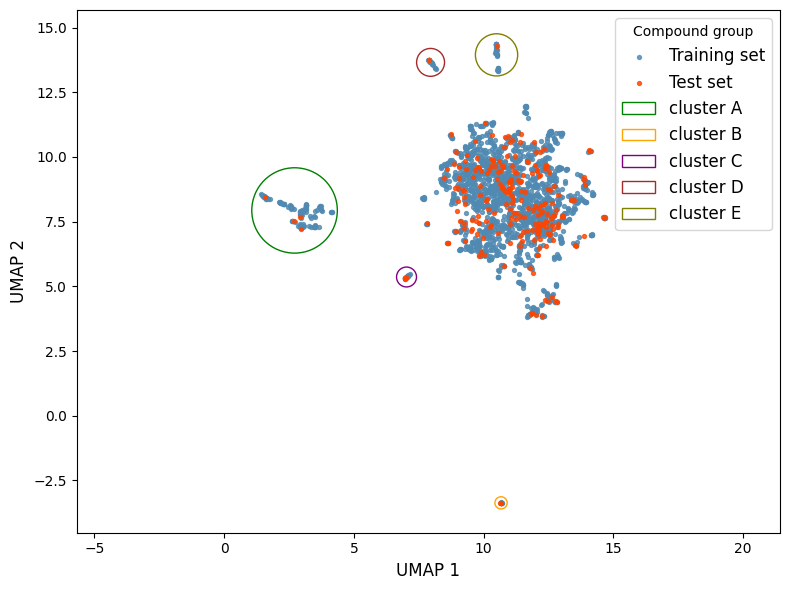

In [22]:
plot_umap_trainingAndtext_morgan2(morgan2_cols, dataframe)

/home/hzhang/anaconda3/envs/trialblazer/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hzhang/anaconda3/envs/trialblazer/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


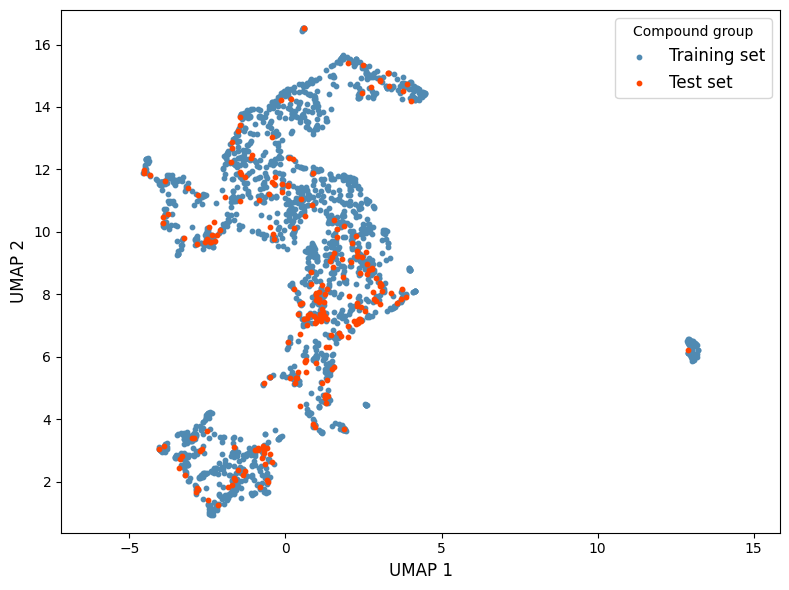

In [23]:
plot_umap_trainingAndtext_physichem(scaled_property_data, dataframe)

/home/hzhang/anaconda3/envs/trialblazer/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hzhang/anaconda3/envs/trialblazer/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


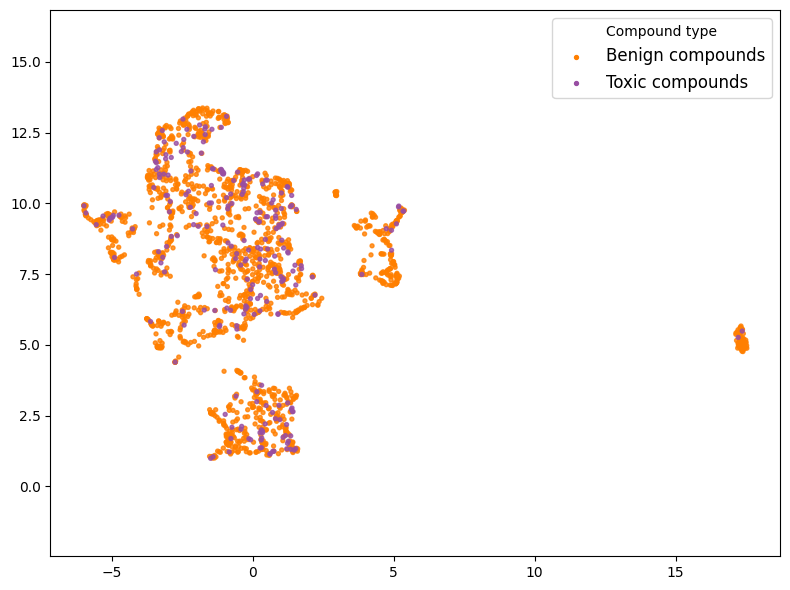

In [27]:
plot_umap_benignAndtoxic(scaled_property_data, dataframe)

/home/hzhang/anaconda3/envs/trialblazer/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hzhang/anaconda3/envs/trialblazer/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


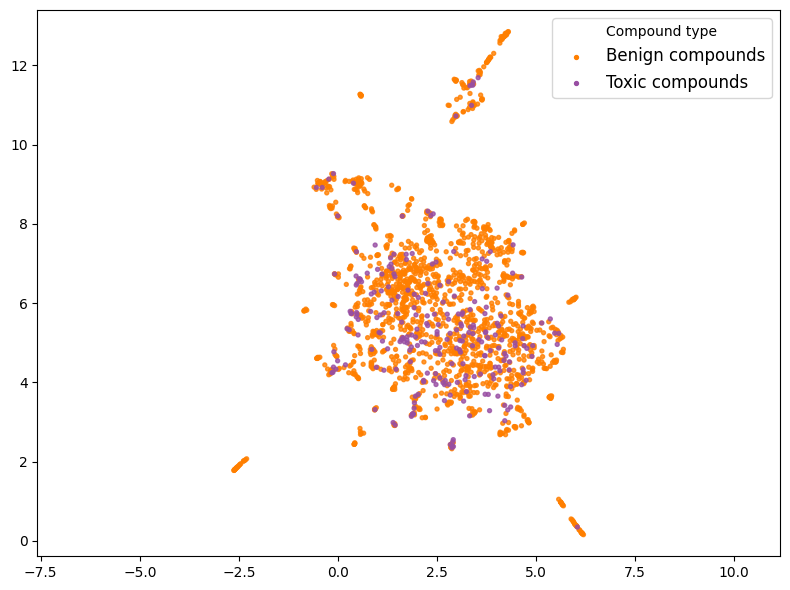

In [28]:
plot_umap_benignAndtoxic(morgan2_cols, dataframe)

# Pairwise tanimoto similarity

## Similairty comparison between two classes of data in training set

Generated h5 file of benign class using FPSim2Engine

In [29]:
list_smi_benign = benign_set['SmilesForDropDu'].tolist()
outputFolder = '../Data/Benign_set.h5'
benign_fpe = FPSim2Engine(outputFolder)

Calculate tanimoto similarity

In [ ]:
similairty_results = pairwise_tanimoto_similarity(list_smi_benign, toxic_set, benign_fpe)

Select the closest neighbors and plot the figure

In [31]:
closest_neighbors_training = np.max(similairty_results[list_smi_benign], axis=1)
steps = np.linspace(0, 1, 10000)

In [32]:
# Calculate the percentage of compounds with a Tanimoto similarity coefficient greater than or equal to each sampling point from 0 to 1
sim_bins_training = [((closest_neighbors_training >= s).sum() / closest_neighbors_training.shape[0])* 100 for s in steps]

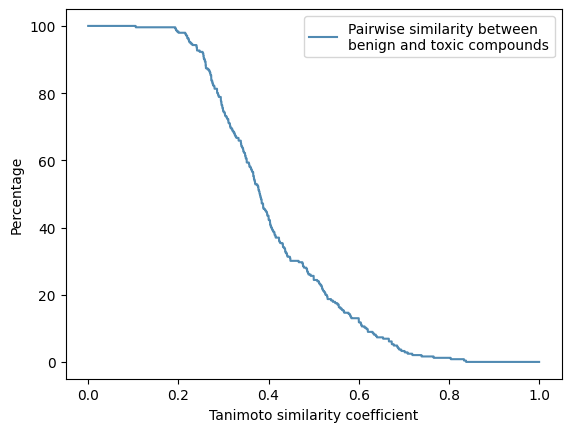

In [33]:
plt.plot(steps, sim_bins_training, label='Pairwise similarity between\nbenign and toxic compounds', color='#508AB2')
plt.xlabel('Tanimoto similarity coefficient')
plt.ylabel('Percentage')
plt.legend(loc='upper right')

## Similarity comparison between training set and test sets

In [34]:
list_smi_training = Training_data['SmilesForDropDu'].tolist()
list_smi_approvaldrugs = testset['SmilesForDropDu'].tolist()

In [35]:
outputFolder = '../Data/training_data.h5'
training_fpe = FPSim2Engine(outputFolder)

Calculate tanimoto similarity between training set and tests sets

In [ ]:
pairwise_similarity_result = pairwise_tanimoto_similarity(list_smi_training,testset, training_fpe)

Plot the pairwise similarity figure

In [38]:
masked_array_ApprovalDrugs = np.where(pairwise_similarity_result[list_smi_training] == 1, -np.inf, pairwise_similarity_result[list_smi_training])
masked_array_ApprovalDrugs = masked_array_ApprovalDrugs.T

In [39]:
closest_neighbors_approvaldrugs = np.max(masked_array_ApprovalDrugs, axis=1)
steps = np.linspace(0, 1, 10000)
sim_bins_approvaldrugs = [((closest_neighbors_approvaldrugs >= s).sum() / closest_neighbors_approvaldrugs.shape[0])* 100 for s in steps]

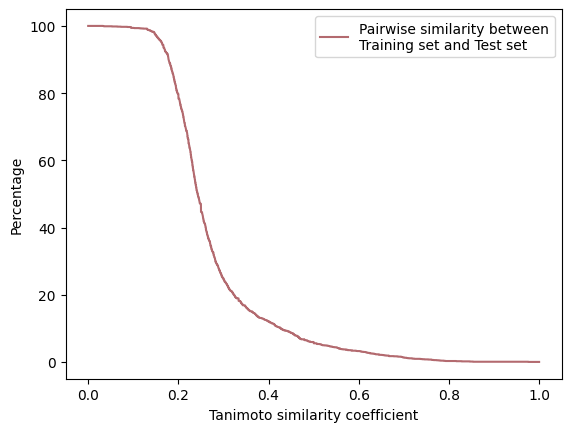

In [40]:
plt.plot(steps, sim_bins_approvaldrugs,label='Pairwise similarity between\nTraining set and Test set',color='#B36A6F')
plt.xlabel('Tanimoto similarity coefficient')
plt.ylabel('Percentage')
plt.legend(loc='upper right')

## Visualize the chemical structure of the most similar compounds between two classes in training set

Select the compound pairs where the Tanimoto similarity is greater than 0.6

In [41]:
similar_compounds_pd = pd.DataFrame()
similar_compounds = []
li_append = []
dw_toxic = []
for i, series in enumerate(similairty_results[list_smi_benign]):
        similarity_values = list(similairty_results.get(series))
        for a, li in enumerate(similarity_values):
            if li >= 0.6:
                similar_compounds.append(similairty_results.smi[a])
                dw_toxic.append(similairty_results.smi[a])
                li_append.append(li)
                similar_compounds.append(series)
                li_append.append(li)
similar_compounds_pd['similar_compounds_pairs'] = similar_compounds
similar_compounds_pd['mol'] = similar_compounds_pd['similar_compounds_pairs'].apply(Chem.MolFromSmiles)
similar_compounds_pd['tanimoto_similarity'] = li_append

In [42]:
top_10_similar = similar_compounds_pd.sort_values(by='tanimoto_similarity', ascending=False).head(20)
identifiers = [(i // 2) + 1 for i in range(20)]
top_10_similar['pair'] = identifiers

Graphic-grid

In [43]:
top_10_similar['mol_with_stereo'] = top_10_similar['similar_compounds_pairs'].apply(Chem.MolFromSmiles)

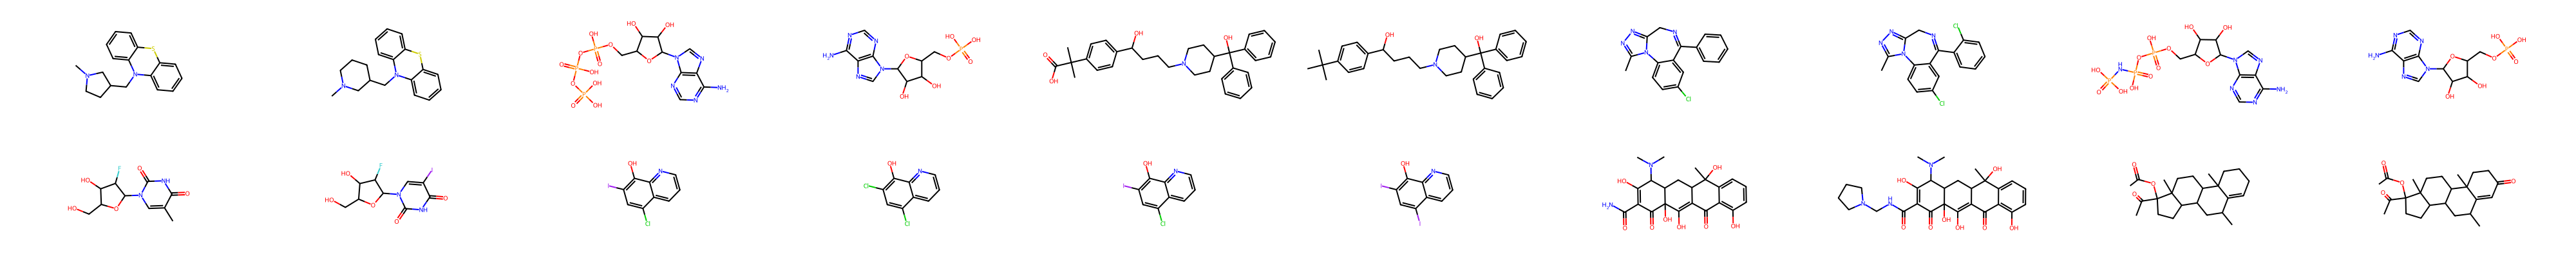

In [44]:
drawing_options = Chem.Draw.rdMolDraw2D.MolDrawOptions()
drawing_options.legendFontSize = 30
img = Chem.Draw.MolsToGridImage(list(top_10_similar['mol_with_stereo']),molsPerRow=10,subImgSize=(400,200), returnPNG=False, drawOptions=drawing_options)
img

# Physicochemical properties comparision

Descriptors calculation

In [45]:
calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList]);
desc_cols = list(calc.GetDescriptorNames())

In [ ]:
Training_data = desc_calculation(Training_data, desc_cols)
testset = desc_calculation(testset, desc_cols)

In [47]:
benign_set = Training_data[Training_data['Mark'] == 0]
toxic_set = Training_data[Training_data['Mark'] == 1]

In [48]:
selected_desc = ['MolWt', 'NumHAcceptors','NumHDonors','MolLogP', 'FractionCSP3','NumAromaticRings']

Statistical analysis of the physicochemical properties

In [49]:
print(benign_set[selected_desc].mean(axis=0).round(2))
print(benign_set[selected_desc].std(axis=0).round(2))
print(toxic_set[selected_desc].mean(axis=0).round(2))
print(toxic_set[selected_desc].std(axis=0).round(2))

MolWt               373.85
NumHAcceptors         5.09
NumHDonors            2.01
MolLogP               2.60
FractionCSP3          0.46
NumAromaticRings      1.60
dtype: float64
MolWt               140.53
NumHAcceptors         3.16
NumHDonors            1.97
MolLogP               2.63
FractionCSP3          0.26
NumAromaticRings      1.24
dtype: float64
MolWt               341.93
NumHAcceptors         4.26
NumHDonors            1.60
MolLogP               2.95
FractionCSP3          0.35
NumAromaticRings      1.84
dtype: float64
MolWt               111.12
NumHAcceptors         2.33
NumHDonors            1.63
MolLogP               2.02
FractionCSP3          0.23
NumAromaticRings      1.08
dtype: float64


Plot the figures

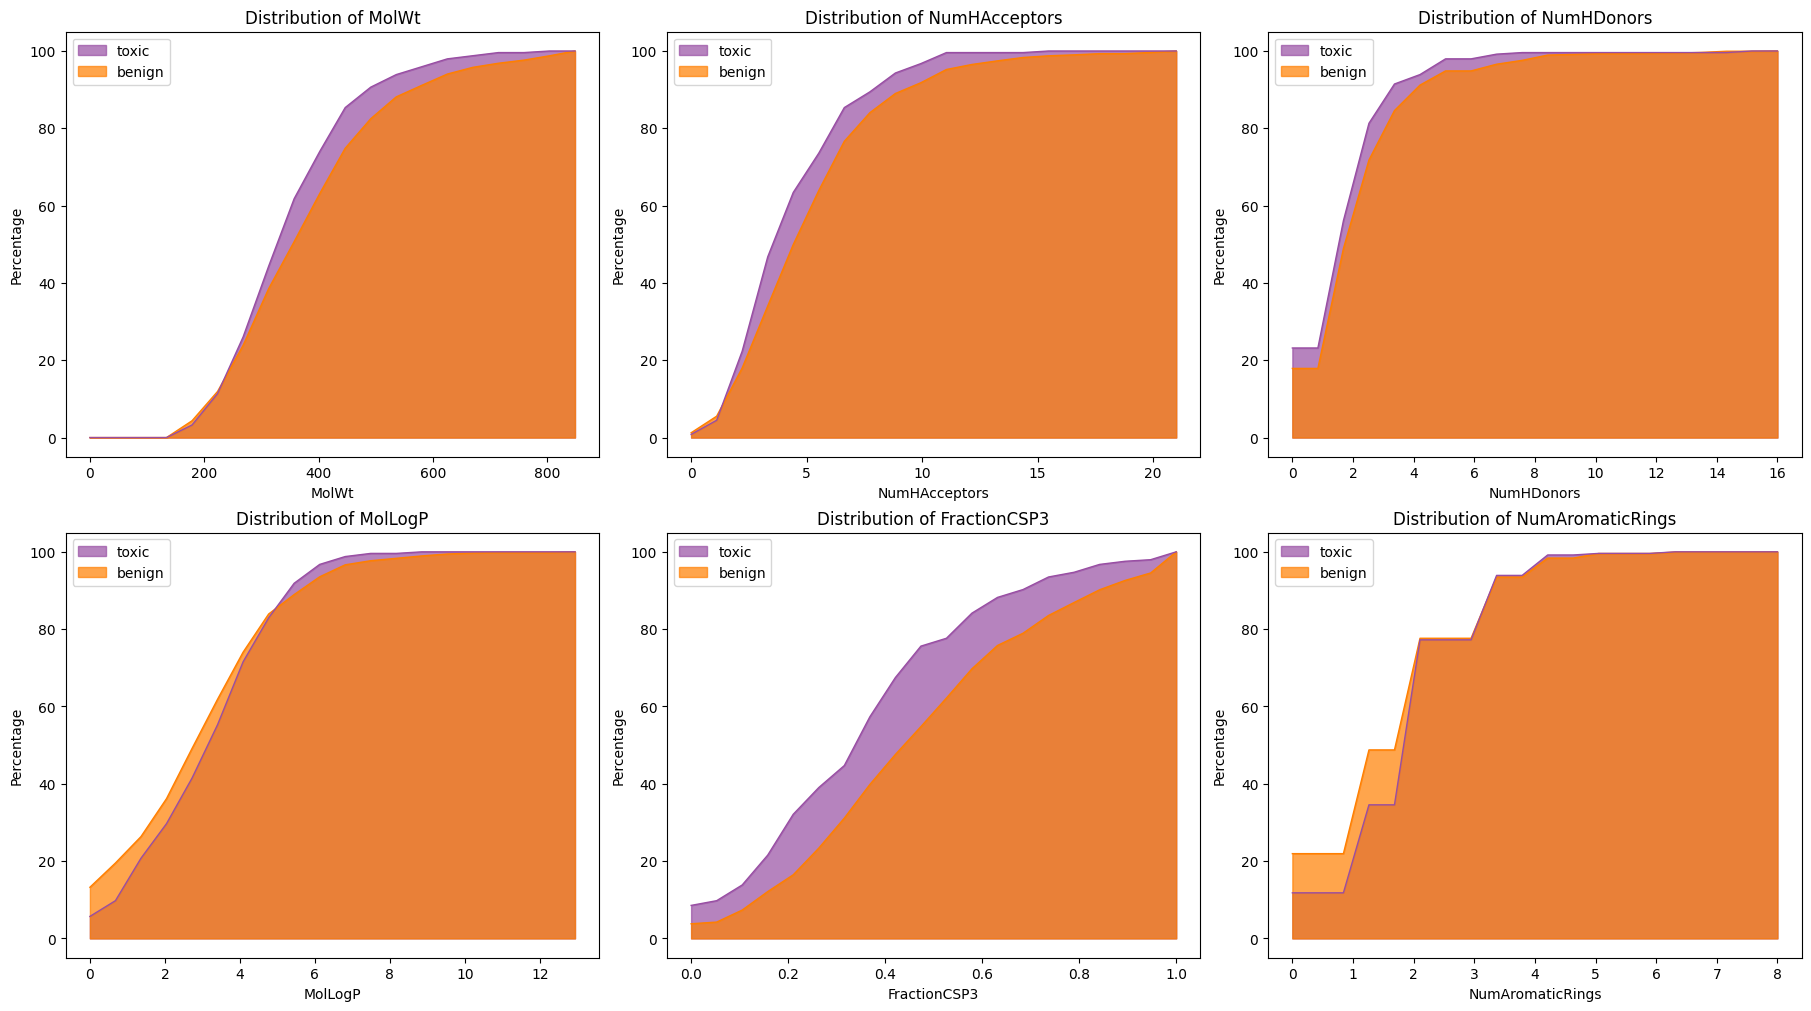

In [50]:
plot_distribution_of_physichem_prop(Training_data, selected_desc, benign_set, toxic_set)

# Murcko scaffolds matching

In [51]:
toxic = add_murcko_scaffold(toxic_set)
benign = add_murcko_scaffold(benign_set)

/home2/hzhang/HuanniZ/Trialblazer_notebook/Dataset_characterization/characterization.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Molecule'] = df.SmilesForDropDu.apply(Chem.MolFromSmiles)
/home2/hzhang/HuanniZ/Trialblazer_notebook/Dataset_characterization/characterization.py:236: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['MurckoScaffold'] = df.Molecule.apply(MurckoScaffold.GetScaffoldForMol)
/home2/hzhang/HuanniZ/Trialblazer_notebook/Dataset_characterization/characterization.py:236: SettingWithCopy

Common scaffolds in two classes

In [52]:
toxic_MS_list = set(toxic['MurckoScaffold_smi'])
Same_Murcko = benign[benign['MurckoScaffold_smi'].isin(toxic_MS_list)]

In [53]:
Same_Murcko_drop = Same_Murcko.drop_duplicates(subset= ['MurckoScaffold_smi'])
shared_scaffold = Same_Murcko_drop['MurckoScaffold_smi'].tolist()
# Filter dataframes for shared scaffolds
shared_benign = benign[benign.MurckoScaffold_smi.isin(shared_scaffold)]
shared_toxic = toxic[toxic.MurckoScaffold_smi.isin(shared_scaffold)]
# Count occurrences and calculate percentages
shared_toxic_count = shared_toxic.groupby('MurckoScaffold_smi').size().reset_index(name='count_toxic')
shared_benign_count = shared_benign.groupby('MurckoScaffold_smi').size().reset_index(name='count_benign')
shared_toxic_count['percentage_toxic'] = (shared_toxic_count['count_toxic'] / 246) * 100
shared_benign_count['percentage_benign'] = (shared_benign_count['count_benign'] / 1610) * 100
# Merge and calculate difference
merged_two_classes = shared_toxic_count.merge(shared_benign_count, on='MurckoScaffold_smi', how='left')
merged_two_classes['difference'] = round(merged_two_classes['percentage_toxic'] - merged_two_classes['percentage_benign'], 2)

Overview of the unique caffolds in two classes

In [54]:
print(f"the number of unique MurckoScaffold in bengin class: {len(set(benign['MurckoScaffold_smi']))}")
print(f"the number of unique MurckoScaffold in toxic class: {len(toxic_MS_list)}")
print(f"the number of the shared MurckoScaffold between to classes: {len(Same_Murcko_drop)}")

the number of unique MurckoScaffold in bengin class: 1026
the number of unique MurckoScaffold in toxic class: 175
the number of the shared MurckoScaffold between to classes: 41


In [55]:
round(merged_two_classes.sort_values(by='difference', ascending=False).head(5),2)

,MurckoScaffold_smi,count_toxic,percentage_toxic,count_benign,percentage_benign,difference
37,c1ccccc1,29,11.79,116,7.20,4.58
30,c1ccc(Cc2ccccc2)cc1,6,2.44,8,0.50,1.94
4,O=C(Nc1ccccc1)c1ccccc1,5,2.03,2,0.12,1.91
33,c1ccc2ccccc2c1,5,2.03,5,0.31,1.72
29,c1ccc(CCc2ccccc2)cc1,3,1.22,1,0.06,1.16


Number of unique MurckoScaffolds in benign set: 1026
Number of unique MurckoScaffolds in toxic set: 175
Number of shared scaffolds between two sets: 41
Percentage of shared scaffolds in query set: 23.43%
Size of the largest MurckoScaffold cluster in query set: 29


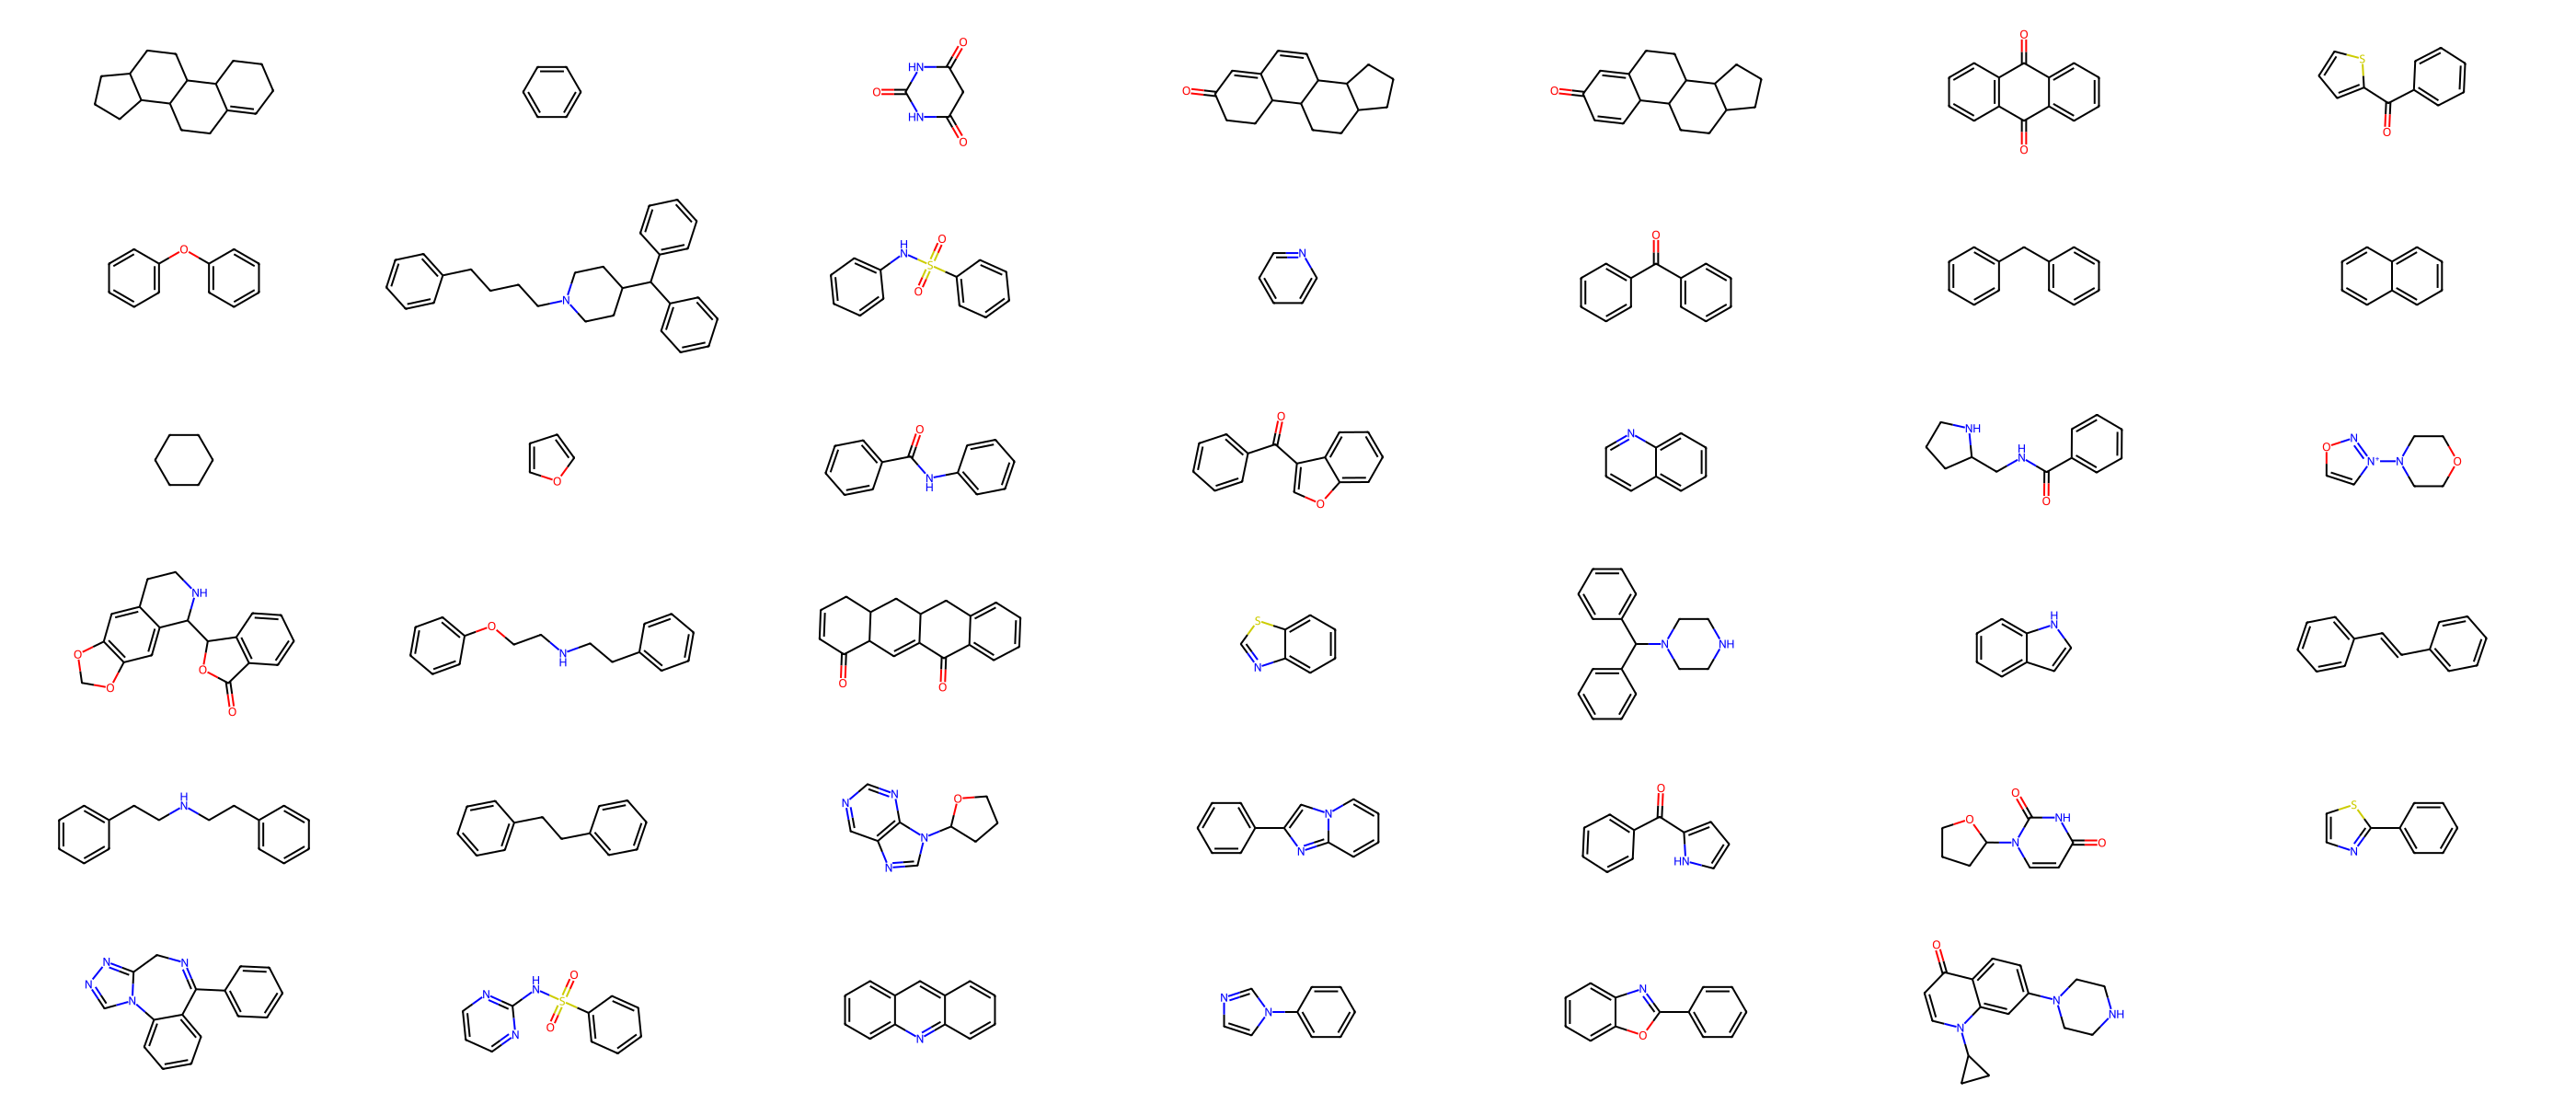

In [56]:
count_shared_scaffold(benign, toxic, img=True)

Most prominent scaffolds among benign and toxic compounds

In [57]:
toxic_notempty_count = toxic.groupby('MurckoScaffold_smi')['MurckoScaffold_smi'].count().sort_values(ascending=False)
benign_notempty_count = benign.groupby('MurckoScaffold_smi')['MurckoScaffold_smi'].count().sort_values(ascending=False)

In [58]:
round(((toxic_notempty_count /246)*100),2).head(5)

MurckoScaffold_smi
c1ccccc1                           11.79
c1ccc(Cc2ccccc2)cc1                 2.44
O=C(Nc1ccccc1)c1ccccc1              2.03
c1ccc2ccccc2c1                      2.03
O=C1CC(=O)N(c2ccccc2)N1c1ccccc1     1.63
Name: MurckoScaffold_smi, dtype: float64

In [59]:
round(((benign_notempty_count /1610)*100),2).head(5)

MurckoScaffold_smi
c1ccccc1                           7.20
O=C1C=CC2C(=C1)CCC1C3CCCC3CCC21    1.68
O=C1C=C2CCC3C4CCCC4CCC3C2CC1       1.37
c1ccc(Cc2ccccc2)cc1                0.50
C1CCCCC1                           0.50
Name: MurckoScaffold_smi, dtype: float64

# Functional group analysis

In [60]:
SMARTS_list = pd.read_csv("../Data/SMARTS_list_InteLigand.csv")

In [ ]:
SMARTS_list['SMARTS_pattern'] = SMARTS_list['SMARTS_pattern'].astype(str)
SMARTS_list['mol_pattern'] = SMARTS_list['SMARTS_pattern'].apply(Chem.MolFromSmarts)
SMARTS_list = SMARTS_list.dropna(subset=['mol_pattern']).reset_index()
SMARTS_list.Pattern_name = SMARTS_list.Pattern_name.str.rstrip(':')
Pattern_name = SMARTS_list.Pattern_name.to_list()

In [62]:
funtional_group_benign = functional_group_analysis(benign, SMARTS_list)
funtional_group_toxic = functional_group_analysis(toxic, SMARTS_list)
funtional_group_benign_nona = funtional_group_benign[funtional_group_benign.SMARTS_pattern != 'nan']
funtional_group_toxic_nona = funtional_group_toxic[funtional_group_toxic.SMARTS_pattern != 'nan']

In [63]:
count_toxic = (funtional_group_toxic_nona.groupby('SMARTS_pattern')['Pattern_name'].count().reset_index(name='pattern_count_toxic').sort_values(by='pattern_count_toxic', ascending=False))
count_benign = (funtional_group_benign_nona.groupby('SMARTS_pattern')['Pattern_name'].count().reset_index(name='pattern_count_benign').sort_values(by='pattern_count_benign', ascending=False))

In [64]:
count_benign['percentage_benign'] = (count_benign.pattern_count_benign / 25379)*100
count_toxic['percentage_toxic'] = (count_toxic.pattern_count_toxic / 3503)*100

In [65]:
outer = count_benign.merge(count_toxic, how='outer', on='SMARTS_pattern')
outer_fillna = outer.fillna(0)
outer_fillna['difference'] = outer_fillna['percentage_benign'] - outer_fillna['percentage_toxic']

In [66]:
outer_fillna_difference = outer_fillna.sort_values(by='difference', ascending=False).head(10)
outer_fillna_difference_withname = outer_fillna_difference.merge(SMARTS_list[['SMARTS_pattern','Pattern_name']], on='SMARTS_pattern', how='left')

In [67]:
outer_fillna_difference_withname.head(10).round(2)

,SMARTS_pattern,pattern_count_benign,percentage_benign,pattern_count_toxic,percentage_toxic,difference,Pattern_name
0,"[OX2H][CX4;!$(C([OX2H])[O,S,#7,#15])]",462.0,1.82,36.0,1.03,0.79,Alcohol
1,"[OX2H][CX4H;!$(C([OX2H])[O,S,#7,#15])]",309.0,1.22,22.0,0.63,0.59,Secondary_alcohol
2,"[OX2H][CX4H2;!$(C([OX2H])[O,S,#7,#15])]",168.0,0.66,10.0,0.29,0.38,Primary_alcohol
3,"[NX3v3,SX2,OX2;$(**=[#7,#8,#15,#16])][CX4;!$(C...",73.0,0.29,1.0,0.03,0.26,Hetero_methylen_ester_and_similar
4,[R;$(*(@*)(@*)@*);!$([R2;$(*(@*)(@*)(@*)@*)])]...,802.0,3.16,102.0,2.91,0.25,Annelated_rings
5,"[NX3v3,SX2,OX2;$(**=[#7,#8,#15,#16])][CX4;!$(C...",69.0,0.27,1.0,0.03,0.24,NOS_methylen_ester_and_similar
6,"[OX2]([CX4;!$(C([OX2])[O,S,#7,#15,F,Cl,Br,I])]...",154.0,0.61,13.0,0.37,0.24,Dialkylether
7,[nX3H1+0],160.0,0.63,14.0,0.40,0.23,Hetero_N_basic_H
8,"[NX3H2+0,NX4H3+;!$([N][!C]);!$([N]*~[#7,#8,#15...",89.0,0.35,5.0,0.14,0.21,Primary_aliph_amine
9,[CX4H1]([#6])([#6])[#6],506.0,1.99,63.0,1.80,0.20,Tertiary_carbon
